# Week 7 : Lab A
 ## Test, log, debug and optimize
 ##### CS1P - University of Glasgow - John H. Williamson - 2019/2020 -- Python 3.x

## Lab exercise

**You must submit a reasonble attempt at this exercise to gain a tick for this work**.

**Note that Part B is in a separate Moodle download.**

<div class="alert alert-box alert-danger"> 
Remember to save your work frequently! </div>

## Purpose of this lab

This lab will get you up to speed on:
* reading and writing simple logs
* writing tests with `assert`
* profiling and optimising code
* using the `ipdb` debugger

## Before the lab
* Attempt at least the A exercises.



In [2]:
## RUN THIS CELL FIRST!
%load_ext autoreload
%autoreload 2

from utils.tick import tick
from utils.test_utils import should_pass, should_fail
from utils.test_utils import reset_tracking, track, verify_track
from utils.complexity import time_complexity            
from IPython.core.debugger import set_trace
print("All loaded OK")

All loaded OK


## A.1 Assertions

Write a function `test_list(l)` which uses `assert` to check if a list `l` satisfies all of these constraints:

* the list is non-empty
* the list contains only strings
* every string is nonempty
* every string has only lower case letters in it
* every string is unique
* the length of the list is even


In [3]:
# Solution goes here
def test_list(l):
    assert len(l) > 0, "the list is empty"
    assert len(l)%2 == 0, "length of the list is odd"
    onlyStrings = True
    nonEmpty = True
    onlyLower = True
    unique = True
    seen = []
    for s in l:
        if type(s) == type("string"):
            if s in seen:
                unique = False
            if not s.islower():
                onlyLower = False
            if len(s) == 0:
                nonEmpty = False
            seen.append(s)
        else:
            onlyStrings = False
    assert onlyStrings == True, "the list does not contain only strings"
    assert nonEmpty == True, "there is at least one empty string"
    assert onlyLower == True, "at least one string has an upper case character in it"
    assert unique == True, "not unique"
    
    
    

In [4]:
## Tests
with tick():
    should_fail(test_list, [])
    should_fail(test_list, [""])
    should_fail(test_list, ["a"])
    should_fail(test_list, [1, "a"])
    should_fail(test_list, [1, 2])
    should_fail(test_list, ["a", "b", "c"])
    should_fail(test_list, ["alpha", ""])
    should_fail(test_list, ["a", "b", "c", "a"])
    should_fail(test_list, ["a", "a"])
    should_fail(test_list, ["a", "b", "3", "."])
    should_fail(test_list, ["A", "B", "C", "D"])
    should_fail(test_list, ["alpha", "Bravo", "charlIe", "delta"])
    should_fail(test_list, ["a", "b", "c", ""])

with tick():
    should_pass(test_list, ["a", "b"])
    should_pass(test_list, ["alpha", "bravo"])
    should_pass(test_list, ["alpha", "bravo", "charlie", "d"])
    should_pass(test_list, ["ale", "base", "cheap", "liqour"])
    should_pass(test_list, ["ale", "base", "cheap", "liqour", "twenty", "thirty"])


## A.2 Time complexity

The function below runs in constant time -- it doesn't depend on the value of `n` and takes the same each time it is called regardless. The `time_complexity()` call shows this as a graph, and gives scores, which should show the time complexity is most likely to be constant (it will have the highest score printed).


Scores for constant_time
  constant     90.5%
  log           3.7%
  linear        1.5%
  nlogn         1.4%
  quadratic     1.1%
  cubic         1.0%
  exp           0.8%
  factorial     0.0%


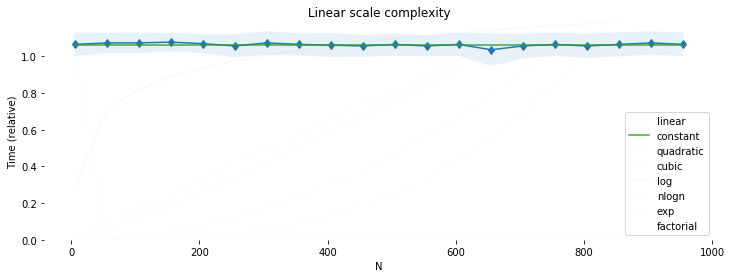

In [25]:
def constant_time(n):
    i = n 
    return i


# number=30: run the function 30 times and average the result
# ns= range(1, 1000, 50): set n to values from 1 to 1000, stepping by 50 each time
# reps=50: repeat the whole experiment 50 times
time_complexity(constant_time, ns=range(5, 1000, 50), number=30, reps=50);

**Task** Using **nested loops** write functions which take a parameter `n` and  do computations which will run in:

* `linear_time(n)` which runs in O(N) linear time
* `quadratic_time(n)` which runs in O(N^2) quadratic time
* `cubic_time(n)` which runs in O(N^3) cubic time

Plot graphs for each, using `time_complexity`. Use `number=20`, `ns=range(5, 100, 5)`, `reps=15`



Scores for linear_time
  linear       45.2%
  nlogn        20.0%
  log          10.6%
  quadratic     9.0%
  constant      6.3%
  cubic         6.1%
  exp           2.7%
  factorial     0.0%

Scores for quadratic_time
  nlogn        31.3%
  linear       25.1%
  quadratic    15.9%
  cubic         9.4%
  log           8.6%
  constant      6.2%
  exp           3.5%
  factorial     0.0%

Scores for cubic_time
  cubic        62.4%
  quadratic    16.1%
  nlogn         7.1%
  linear        5.8%
  log           3.5%
  constant      3.0%
  exp           2.2%
  factorial     0.0%


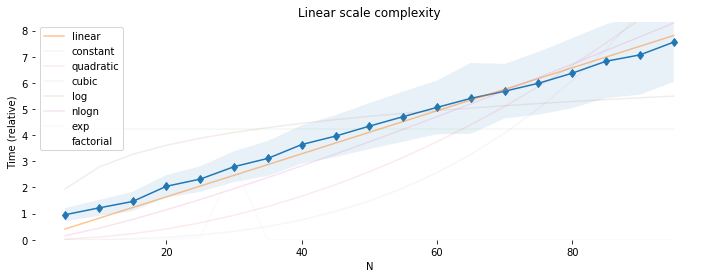

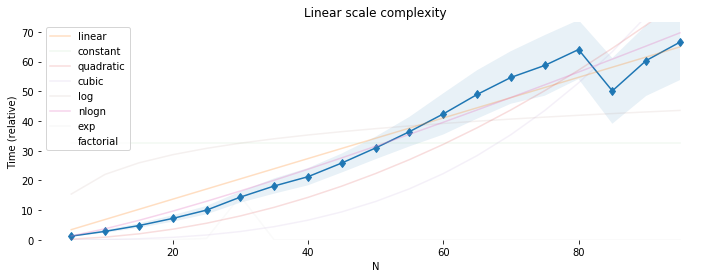

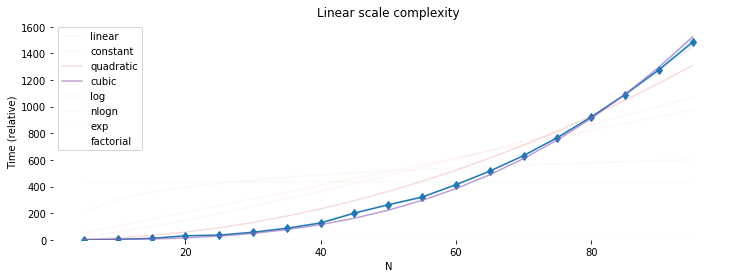

In [28]:
# Solution goes here
def linear_time(n):
    m = 0
    for i in range(n):
        m += i
    return m
    
def quadratic_time(n):
    m = 0
    for i in range(n):
        for j in range(n):
            m = j
    return m
    
def cubic_time(n):
    m = 0
    for i in range(n):
        for j in range(n):
            for k in range(n):
                m += k
    return m
    
time_complexity(linear_time, ns=range(5, 100, 5), number=20, reps=15);   
time_complexity(quadratic_time, ns=range(5, 100, 5), number=20, reps=15);   
time_complexity(cubic_time, ns=range(5, 100, 5), number=20, reps=15);   

In [17]:
## Tests
with tick():
    _, _, scores = time_complexity(linear_time, ns=range(5, 100, 3), number=5, plot=False, reps=40);
    assert scores["linear"]>0.2 

with tick():
    _, _, scores = time_complexity(quadratic_time, ns=range(5, 100, 3), number=5, plot=False, reps=40);
    assert scores["quadratic"]>0.5

with tick():    
    _, _, scores = time_complexity(cubic_time, ns=range(5, 100, 3), number=5, plot=False, reps=40);
    assert scores["cubic"]>0.5



AssertionError: 

## A.2B (OPTIONAL EXTENSION) 

Write a function that runs in O(N log N) time, and plot the time complexity graph. (hint: how long does `x.sorted()` take for a list of `n` *random* items x?)

In [22]:
# Solution goes here

# A.3 Visualise recursion with logging

Many people find it hard to visualise what is going on in recursion. Use the *principles of logging* to add `print` statements that make a trace of what happens when the recursive function below is called. 

Try and print out the results nicely; you might want to add additional parameters to the function to make logging nicer.


In [6]:
## This function returns the ordered permutations of a sequence

def permutations(l, perm=[]):
    if len(l) == 0: 
        return [perm]
    
    results = []
    for i in range(len(l)):        
        results += permutations(l[:i] + l[i+1:], perm + [l[i]])
    return results

permutations("abc")

[['a', 'b', 'c'],
 ['a', 'c', 'b'],
 ['b', 'a', 'c'],
 ['b', 'c', 'a'],
 ['c', 'a', 'b'],
 ['c', 'b', 'a']]

In [18]:
# Solution goes here
def permutations(l, perm=[]):    
    if len(l) == 0: 
        print("function called with an empty list and perm =",perm)
        return [perm]
    else:
        print("function called with l =",l,"and perm =",perm)
    
    results = []
    for i in range(len(l)): 
        current = permutations(l[:i] + l[i+1:], perm + [l[i]])       
        results += current
        print("permutations","\nl".ljust(12),"|",l,"\nresults".ljust(12),"|",results,"\ni".ljust(12),"|",i)
    return results

permutations("abc")

function called with l = abc and perm = []
function called with l = bc and perm = ['a']
function called with l = c and perm = ['a', 'b']
function called with an empty list and perm = ['a', 'b', 'c']
permutations 
l           | c 
results     | [['a', 'b', 'c']] 
i           | 0
permutations 
l           | bc 
results     | [['a', 'b', 'c']] 
i           | 0
function called with l = b and perm = ['a', 'c']
function called with an empty list and perm = ['a', 'c', 'b']
permutations 
l           | b 
results     | [['a', 'c', 'b']] 
i           | 0
permutations 
l           | bc 
results     | [['a', 'b', 'c'], ['a', 'c', 'b']] 
i           | 1
permutations 
l           | abc 
results     | [['a', 'b', 'c'], ['a', 'c', 'b']] 
i           | 0
function called with l = ac and perm = ['b']
function called with l = c and perm = ['b', 'a']
function called with an empty list and perm = ['b', 'a', 'c']
permutations 
l           | c 
results     | [['b', 'a', 'c']] 
i           | 0
permutations 
l 

[['a', 'b', 'c'],
 ['a', 'c', 'b'],
 ['b', 'a', 'c'],
 ['b', 'c', 'a'],
 ['c', 'a', 'b'],
 ['c', 'b', 'a']]

## A.4 Test driven development


<img src="imgs/palette.jpg" width="100%">
*Image: "DSC_8226" by huguet92 is licensed under CC BY-NC-ND 2.0* 

The code below is supposed to do something with colours. The `hexify_colour` function doesn't work and you don't know exactly what the code is supposed to do. It was written by a junior developer and has a lot of issues, even though it looks basically correct.  

But you do have tests which check what the results *should* be. Using these tests:

* work out what the code should be doing
* fix it so it does the right thing


In [53]:
def hexify_color(r,g=None,b=None):        
    r_int = int(r*255)
    g_int = int(g*255)
    b_int = int(b*255)    
    s = "#{r:03x}{b:02x}{g:02x}".format(r=r_int, g=g_int, b=b_int)    
    print(s)    

In [68]:
## Tests
with tick():
    assert hexify_color(0.0, 0.0, 0.0) == '#000000'
    assert hexify_color(0.5, 0.5, 0.5) == '#7f7f7f'
    assert hexify_color(1.0, 1.0, 1.0) == '#ffffff'
    assert hexify_color(1.0, 0.0, 0.0) == '#ff0000'
    assert hexify_color(0.0, 1.0, 0.0) == '#00ff00'
    assert hexify_color(0.0, 0.0, 1.0) == '#0000ff'
    assert hexify_color(1.0) == '#ffffff'
    assert hexify_color(0.0) == '#000000'
    assert hexify_color(-1.0, 0.0, 1.0) == '#0000ff'
    assert hexify_color(-1.0, 0.0, 10.0) == '#0000ff'
    assert hexify_color(10.0, 10.0, 10.0) == '#ffffff'

    assert hexify_color(-1.0) == '#000000'
    assert hexify_color(0.5) == '#7f7f7f'

    should_fail(hexify_color, 0.5, 0.5)
    should_fail(hexify_color, 0.5, 0.5)

#000000
#7f7f7f
#ffffff
#ff0000
#00ff00
#0000ff
#ffffff
#000000
#0000ff
#0000ff
#ffffff
#000000
#7f7f7f


In [67]:
# Solution goes here
def hexify_color(r,g=None,b=None): 
    if r < 0:
        r = 0
    if r > 1:
        r = 1
    if g == None and b == None:        
        g = r
        b = r
    else:        
        if g < 0:
            g = 0
        if g > 1:
            g = 1
        if b < 0:
            b = 0
        if b > 1:
            b = 1
    r_int = int(r*255)
    g_int = int(g*255)
    b_int = int(b*255)    
    s = "#{r:02x}{g:02x}{b:02x}".format(r=r_int, g=g_int, b=b_int)
    print(s)
    return s    

## A.4 Basic ipdb


The code below is a solution to Lab 3, A.4. Practice tracing through this code using the `ipdb` debugger. You should watch the video tutorial on ipdb (Week 7's video) before attempting this part.

Here's a quick reference to `ipdb` commands:


### Basic debugger commands

The `ipdb` debugger can either take single letter commands or the full text. 

* `s` **step** execute the next line, and *enter* any function that is called
* `n` **next** execute the next line, and *skip* over any function that is called
* `c` **continue** resume running until the next breakpoint is hit
* **return** continue until the end of the current function
* `r` **run** restart the program
* `l` **list** print out the code corresponding to the current execution point
* `u`/`d` **up/down** in the call stack
* `p` **print** print out a value (e.g. `p my_list` to print out the current value of `my_list`)
* `a` **args** print out the arguments that were used in the call to the current function
* `q` **quit** **YOU MUST QUIT THE DEBUGGER BEFORE ANY OTHER CODE WILL RUN!**
* `b` **breakpoint** <line_number> set a new breakpoint on the given line number (e.g. `b 20`)


You can pre-insert **breakpoints** where the debugger will stop and wait for input by writing `set_trace()` in the code.


---

### Instructions

1. Before you start: Click on the cell, and press `ESC-L` to enable line numbers

1. Add a breakpoint using `set_trace()` at the very start of `all_rotates`
1. Run the cell; `ipdb` will start.
1. You can use `help` at any time to get a list of commands inside the debugger
1. Print out the argument to `all_rotates`
1. Use `list` to see where you are in the code
1. Step into the for loop
1. Step *into* `rotate()` in the first iteration
1. Use `up` to see where the call to `rotate` came from
1. Use `down` to go back into `rotate`
1. Then, in the next iteration, skip over the call to rotate (hint: use `next`)
1. Then, set a breakpoint *in the debugger* at the second `for` loop
1. Continue to that breakpoint
1. Check the value of `rotates` is what you expect
1. Continue execution to the end of the cell
1. **Quit the debugger** using `quit`


In [ ]:
def rotate(s):
    rotated = s[1:] + s[0]
    return rotated

def all_rotates(s):
    rotates = []
    for i in range(len(s)):
        rotates.append(s)
        s = rotate(s)
        
    for rotated in rotates:
        print(rotated)
    
                  
all_rotates("steel")

In [70]:
# Solution goes here
def rotate(s):
    rotated = s[1:] + s[0]
    return rotated

def all_rotates(s):
    set_trace()
    rotates = []
    for i in range(len(s)):
        rotates.append(s)
        s = rotate(s)
        
    for rotated in rotates:
        print(rotated)
    
                  
all_rotates("steel")

> <ipython-input-70-83c6cf7217ab>(8)all_rotates()
      6 def all_rotates(s):
      7     set_trace()
----> 8     rotates = []
      9     for i in range(len(s)):
     10         rotates.append(s)

ipdb> print s
*** SyntaxError: Missing parentheses in call to 'print'. Did you mean print(s)?
ipdb> p s
'steel'
ipdb> l
      3     rotated = s[1:] + s[0]
      4     return rotated
      5 
      6 def all_rotates(s):
      7     set_trace()
----> 8     rotates = []
      9     for i in range(len(s)):
     10         rotates.append(s)
     11         s = rotate(s)
     12 
     13     for rotated in rotates:

ipdb> list
     14         print(rotated)
     15 
     16 
     17 all_rotates("steel")

ipdb> n
> <ipython-input-70-83c6cf7217ab>(9)all_rotates()
      7     set_trace()
      8     rotates = []
----> 9     for i in range(len(s)):
     10         rotates.append(s)
     11         s = rotate(s)

ipdb> s
> <ipython-input-70-83c6cf7217ab>(10)all_rotates()
      8     rotates = []
      

ipdb> n
> <ipython-input-70-83c6cf7217ab>(9)all_rotates()
      7     set_trace()
      8     rotates = []
----> 9     for i in range(len(s)):
     10         rotates.append(s)
     11         s = rotate(s)

ipdb> n
> <ipython-input-70-83c6cf7217ab>(10)all_rotates()
      8     rotates = []
      9     for i in range(len(s)):
---> 10         rotates.append(s)
     11         s = rotate(s)
     12 

ipdb> n
> <ipython-input-70-83c6cf7217ab>(11)all_rotates()
      9     for i in range(len(s)):
     10         rotates.append(s)
---> 11         s = rotate(s)
     12 
     13     for rotated in rotates:

ipdb> n
> <ipython-input-70-83c6cf7217ab>(9)all_rotates()
      7     set_trace()
      8     rotates = []
----> 9     for i in range(len(s)):
     10         rotates.append(s)
     11         s = rotate(s)

ipdb> l
      4     return rotated
      5 
      6 def all_rotates(s):
      7     set_trace()
      8     rotates = []
----> 9     for i in range(len(s)):
     10         rotates.appe

ipdb> n
elste
> <ipython-input-70-83c6cf7217ab>(13)all_rotates()
     11         s = rotate(s)
     12 
1--> 13     for rotated in rotates:
     14         print(rotated)
     15 

ipdb> n
> <ipython-input-70-83c6cf7217ab>(14)all_rotates()
     12 
1    13     for rotated in rotates:
---> 14         print(rotated)
     15 
     16 

ipdb> n
lstee
> <ipython-input-70-83c6cf7217ab>(13)all_rotates()
     11         s = rotate(s)
     12 
1--> 13     for rotated in rotates:
     14         print(rotated)
     15 

ipdb> n
--Return--
None
> <ipython-input-70-83c6cf7217ab>(13)all_rotates()
     11         s = rotate(s)
     12 
1--> 13     for rotated in rotates:
     14         print(rotated)
     15 

ipdb> n
--Call--
> c:\programdata\anaconda3\lib\site-packages\ipython\core\displayhook.py(252)__call__()
    250         sys.stdout.flush()
    251 
--> 252     def __call__(self, result=None):
    253         """Printing with history cache management.
    254 

ipdb> n
> c:\programdata\anaco

ipdb> quit


BdbQuit: 

## A.5 Reading logs

The code below is supposed to take a string then convert it to [Morse code](https://en.wikipedia.org/wiki/Morse_code). It does this by reading a file containing a Morse code table. There are several bugs, but there are logging messages provided to help you understand what is going on. Use the log messages which are generated to work out what the problems are with this code is and fix the code so it works as described above, and passes the tests. **Do not use the debugger, or add additional logging statements to the code**.

<img src="imgs/morse_key.jpg" width="30%">

<center>    
<i> A Morse key, from the days when keyboards had just the one key. Image: by Brad Wilmot CC-NC-ND </i>
</center>

In [74]:
def read_table(fname):
    morse_table = {}
    for letter in "ABCDEFGHIJKLMNOPQRSTUVWXYZ":
        morse_table[letter] = ""
    print("{n} blank entries in the Morse table".format(n=len(morse_table)))
    fname = "morse.txt"
    print("Reading morse table from file '{fname}'".format(fname=fname))
    with open(fname) as f:
        for line in f:
            letter, code = line.split(" ")
            morse_table = {letter: code}
            print("Mapping {letter} to {code}".format(letter=letter, code=code))

    print("{n} entries in Morse table after loading".format(n=len(morse_table)))
    print()
    return morse_table


def convert_to_morse(s):
    print()
    morse_table = read_table("data/morse.txt")
    output = []
    for ch in s:
        upper_ch = ch.upper()
        if upper_ch in morse_table:
            print("Converting {ch} to {code}".format(ch=ch, code=morse_table[upper_ch]))
            output.append(morse_table[ch.upper()])
        else:
            output.append("   ")
        output.append(" ")
    result = "".join(s)
    print("Conversion result is {result}".format(result=result))
    return result

In [113]:
# Solution goes here
def read_table(fname):
    morse_table = {}
    for letter in "ABCDEFGHIJKLMNOPQRSTUVWXYZ":
        morse_table[letter] = ""
    print("{n} blank entries in the Morse table".format(n=len(morse_table)))
    print("Reading morse table from file '{fname}'".format(fname=fname))
    with open(fname) as f:
        for line in f:
            letter, code = line.split(" ")
            letter = letter.upper()
            morse_table[letter] = code.strip()
            print("Mapping {letter} to {code}".format(letter=letter, code=code))

    print("{n} entries in Morse table after loading".format(n=len(morse_table)))
    print()
    return morse_table


def convert_to_morse(s):
    print()
    morse_table = read_table("data/morse.txt")
    output = []
    for ch in s:
        upper_ch = ch.upper()
        if upper_ch in morse_table:
            print("Converting {ch} to {code}".format(ch=ch, code=morse_table[upper_ch]))
            output.append(morse_table[ch.upper()])
        else:
            output.append("   ")
        output.append(" ")
    result = "".join(output[:-1])
    print("Conversion result is {result}".format(result=result))
    return result

In [114]:
with tick():
    assert convert_to_morse('sos')=='... --- ...'
    assert convert_to_morse('hello there')=='.... . .-.. .-.. ---     - .... . .-. .'
    assert convert_to_morse('sphinx of black quartz judge my vow') == '... .--. .... .. -. -..-     --- ..-.     -... .-.. .- -.-. -.-     --.- ..- .- .-. - --..     .--- ..- -.. --. .     -- -.--     ...- --- .--'


26 blank entries in the Morse table
Reading morse table from file 'data/morse.txt'
Mapping A to .-

Mapping B to -...

Mapping C to -.-.

Mapping D to -..

Mapping E to .

Mapping F to ..-.

Mapping G to --.

Mapping H to ....

Mapping I to ..

Mapping J to .---

Mapping K to -.-

Mapping L to .-..

Mapping M to --

Mapping N to -.

Mapping O to ---

Mapping P to .--.

Mapping Q to --.-

Mapping R to .-.

Mapping S to ...

Mapping T to -

Mapping U to ..-

Mapping V to ...-

Mapping W to .--

Mapping X to -..-

Mapping Y to -.--

Mapping Z to --..
26 entries in Morse table after loading

Converting s to ...
Converting o to ---
Converting s to ...
Conversion result is ... --- ...

26 blank entries in the Morse table
Reading morse table from file 'data/morse.txt'
Mapping A to .-

Mapping B to -...

Mapping C to -.-.

Mapping D to -..

Mapping E to .

Mapping F to ..-.

Mapping G to --.

Mapping H to ....

Mapping I to ..

Mapping J to .---

Mapping K to -.-

Mapping L to .-..

Mapping M

<div class="alert alert-box alert-danger">
    
# Part B is an a separate file -- download from Moodle when available
</div>